# Research Notebook
Darius Andrews
## Date: 10/3/2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

-Solved differential equations describing orbital parameters in python and plotted results against the independant variable tau, or against eachother. These equations were all from the draft paper (citation (3)).

## Motivation:

-The swarzschild metric describes black holes with certain equations. f, g, and h are set for the standard metric, so in this project we are solving and plotting these equations with the standard and the quantum corrected metric to compare swarzschild black holes to quantum black holes. This change in metrics is necessary sicne quantm black holes are theorized to behave differently to the classic swarzschild model black holes.


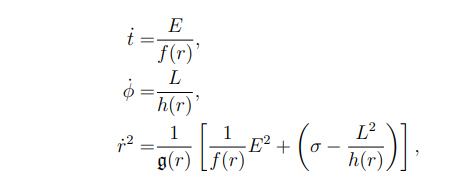




In [35]:
print('The quantum corrected metrics are as follows: (citation (1))')
print('f2(r, M)=-(1+Qb/(r**2))*((1+(Qc+r_s**2)/(4*r**8))**(-1/4))*(1-(r_s)/((r**2+Qb)**(1/2)))')
print('g2(r, M)=((1+(Qc*r_s**2)/(4*r**8))**(1/4))*((1-(r_s)/((r**2+Qb)**(1/2)))**(-1))')
print('h2(r, M)=(r**2)*((1+(Qc*(r_s**2))/(4*r**8))**(1/4))')

print('The standard metric equations are: (citation (3))')
print('f(r, M)=1 - 2 * M / r')
print('g(r, M)=(1 - 2 * M / r)**(-1)')
print('h(r, M)= r ** 2')

The quantum corrected metrics are as follows: (citation (1))
f2(r, M)=-(1+Qb/(r**2))*((1+(Qc+r_s**2)/(4*r**8))**(-1/4))*(1-(r_s)/((r**2+Qb)**(1/2)))
g2(r, M)=((1+(Qc*r_s**2)/(4*r**8))**(1/4))*((1-(r_s)/((r**2+Qb)**(1/2)))**(-1))
h2(r, M)=(r**2)*((1+(Qc*(r_s**2))/(4*r**8))**(1/4))
The standard metric equations are: (citation (3))
f(r, M)=1 - 2 * M / r
g(r, M)=(1 - 2 * M / r)**(-1)
h(r, M)= r ** 2


# 2: What? (What happened?)
## Describe what happened during your activities for the week.

Differential equations describing orbital parameters were solved and plotted. Bugs were frequent, such as negative signs under square root signs. abs value functions were used to try to rectify and it seems to have helped. Also, plots were created that had both the Swarzschild and Quantum models for comaprison. Multiple integration methods were employed when I started, but solve ivp was settled on because setting an initial condition would easily allow adjustments to the starting points of the solutions. 

# 3: So what? (What does it mean?)
## Describe your results
plots for solutions of dt, dr, and dphi, comparing Swarzschild (sc) to Quantum (QBH):


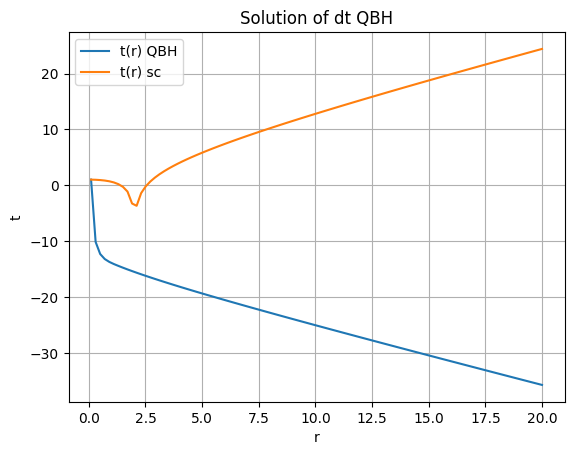

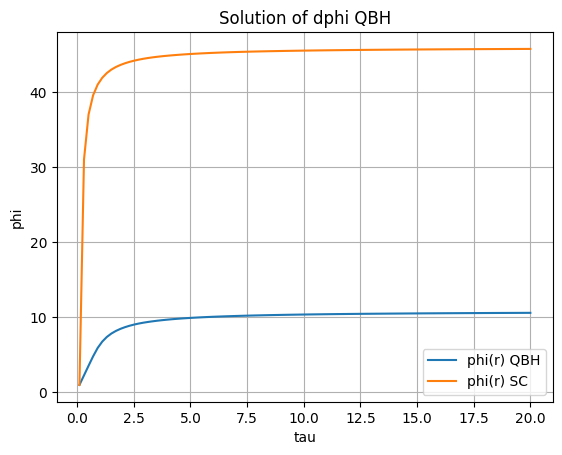

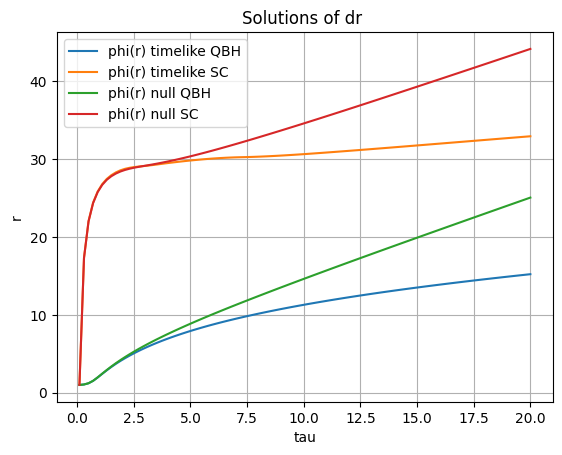


Additionally, a plot was created that put phi and r against eachother, in parametric as well as polar.

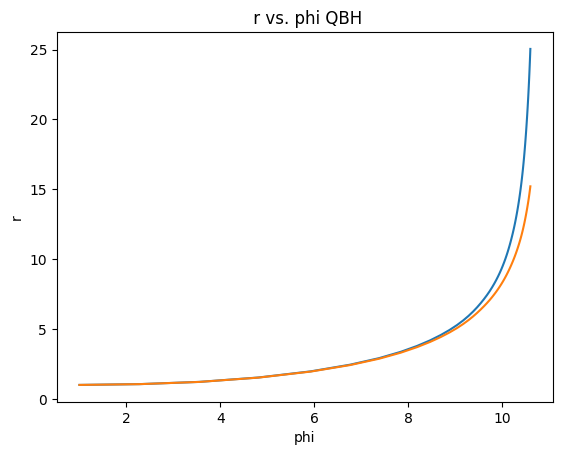

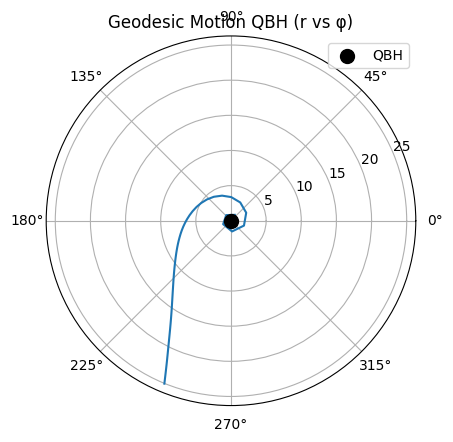


Plots seemed to vary significantly for Swarzschild black holes vs Quantum black holes, however its currently unclear if mistakes were made in the process that could be yielding inaccurate results.

In [16]:
#code block associated with plot 1:

'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#metric functions
def f2(r):
    return -(1+Qb/(r**2))*((1+(Qc+r_s**2)/(4*r**8))**(-1/4))*(1-(r_s)/((r**2+Qb)**(1/2)))

def g2(r):
    return ((1+(Qc*r_s**2)/(4*r**8))**(1/4))*((1-(r_s)/((r**2+Qb)**(1/2)))**(-1))

def h2(r):
    return (r**2)*((1+(Qc*(r_s**2))/(4*r**8))**(1/4))


#metric functions
def f(r, M):
    return 1 - 2 * M / r

def g(r, M):
    return (1 - 2 * M / r)**(-1)

def h(r):
    return r ** 2


def t_diff_eq(r, y):

    return (E)/(f2(r))

def t_diff_eq_sc(r, y):

    return (E)/(f(r,M))


# Define the range of r values
r_min, r_max = 0.1, 20
r_values = np.linspace(r_min, r_max, 100)

# Initial condition
y0 = [1.0]  # Example: y(r=0) = 1

# Solve the differential equation
solution = solve_ivp(t_diff_eq, (r_min, r_max), y0, t_eval=r_values)
solution_sc = solve_ivp(t_diff_eq_sc, (r_min, r_max), y0, t_eval=r_values)

# Plot the solution
plt.plot(solution.t, solution.y[0], label='t(r) QBH')
plt.plot(solution_sc.t, solution_sc.y[0], label='t(r) sc')

plt.xlabel('r')
plt.ylabel('t')
plt.title('Solution of dt QBH')
plt.legend()
plt.grid()
plt.show()

'''

"\n\n###Veff Quantum###\n\n\nM = 1.0 #BH mass\nepsilon = 0 #null geodesic\nE = 1.0 #particle energy\nL = 3.0 #angular momentum of particle\nQb=1\nQc=1\n\n\n#metric functions\ndef f2(r, M):\n    return -(1+Qb/(r**2))*((1+(Qc+r_s**2)/(4*r**8))**(-1/4))*(1-(r_s)/((r**2+Qb)**(1/2)))\n\ndef g2(r, M):\n    return ((1+(Qc*r_s**2)/(4*r**8))**(1/4))*((1-(r_s)/((r**2+Qb)**(1/2)))**(-1))\n\ndef h2(r, M):\n    return (r**2)*((1+(Qc*(r_s**2))/(4*r**8))**(1/4))\n\n\ndef V_eff2(r, L, simga=0):\n    return -(1/2)*f2(r, M) * (((L**2)/h2(r, M))+epsilon)\n\n#schwarzschild radius\nr_s = 2*M \n\nr_list = np.linspace(r_s, 10*r_s, 10000)\n\n#calculate the effective potential\nV_eff2_list = [V_eff2(r, L) for r in r_list]\n\n#plot effective potential with epsilonma=0\nplt.plot(r_list, V_eff2_list)\nplt.xlabel('radius')\nplt.ylabel(r'$V_{\rm eff}$')\nplt.title('eff potential null, Quantum corrected')\nplt.show()\n\n#plot effective potential with epsilon=1\nepsilon=1\nV_eff2_list_timelike = [V_eff2(r, L) for r i

In [ ]:
#code block associated with plot 2:

'''
def diff_eq(r, y):

    return (L)/h2(r)

def diff_eq_sc(r, y):

    return (L)/h(r)

# Define the range of r values
r_min, r_max = 0.1, 20
r_values = np.linspace(r_min, r_max, 100)

# Initial condition
y0 = [1.0]  

# Solve the differential equation
phi_solution = solve_ivp(diff_eq, (r_min, r_max), y0, t_eval=r_values)
phi_solution_sc = solve_ivp(diff_eq_sc, (r_min, r_max), y0, t_eval=r_values)

# Plot the solution
plt.plot(phi_solution.t, phi_solution.y[0], label='phi(r) QBH')
plt.plot(phi_solution_sc.t, phi_solution_sc.y[0], label='phi(r) SC')

plt.xlabel('tau')
plt.ylabel('phi')
plt.title('Solution of dphi QBH')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#code block associated with plot 3:
'''
###QBH
def diff_eq0(r, y):

    epsilon=0 
    ###use absolute values???
    return abs((1/g2(r))*(((E**2)/f2(r))+(epsilon-(L**2)/h2(r))))**(1/2)
    #return (1/((1+(Qc*r_s**2)/(4*r**8))**(1/4))*((1-(r_s)/((r**2+Qb)**(1/2)))**(-1))) * ( ((E**2)/-(1+Qb/(r**2))*((1+(Qc+r_s**2)/(4*r**8))**(-1/4))*(1-(r_s)/((r**2+Qb)**(1/2)))) + (epsilon - (L**2)/((r**2)*((1+(Qc*(r_s**2))/(4*r**8))**(1/4)))) )



def diff_eq1(r, y):

    epsilon=1
    return abs((1/g2(r))*(((E**2)/f2(r))+(epsilon-(L**2)/h2(r))))**(1/2)
    #return (1/((1+(Qc*r_s**2)/(4*r**8))**(1/4))*((1-(r_s)/((r**2+Qb)**(1/2)))**(-1))) * ( ((E**2)/-(1+Qb/(r**2))*((1+(Qc+r_s**2)/(4*r**8))**(-1/4))*(1-(r_s)/((r**2+Qb)**(1/2)))) + (epsilon - (L**2)/((r**2)*((1+(Qc*(r_s**2))/(4*r**8))**(1/4)))) )



####SC FUNCTIONS
def diff_eq0_sc(r, y):

    epsilon=0 
    ###use absolute values???
    return abs((1/g(r))*(((E**2)/f(r))+(epsilon-(L**2)/h(r))))**(1/2)
    #return (1/((1+(Qc*r_s**2)/(4*r**8))**(1/4))*((1-(r_s)/((r**2+Qb)**(1/2)))**(-1))) * ( ((E**2)/-(1+Qb/(r**2))*((1+(Qc+r_s**2)/(4*r**8))**(-1/4))*(1-(r_s)/((r**2+Qb)**(1/2)))) + (epsilon - (L**2)/((r**2)*((1+(Qc*(r_s**2))/(4*r**8))**(1/4)))) )



def diff_eq1_sc(r, y):

    epsilon=-1
    return abs((1/g(r))*(((E**2)/f(r))+(epsilon-(L**2)/h(r))))**(1/2)
    #return (1/((1+(Qc*r_s**2)/(4*r**8))**(1/4))*((1-(r_s)/((r**2+Qb)**(1/2)))**(-1))) * ( ((E**2)/-(1+Qb/(r**2))*((1+(Qc+r_s**2)/(4*r**8))**(-1/4))*(1-(r_s)/((r**2+Qb)**(1/2)))) + (epsilon - (L**2)/((r**2)*((1+(Qc*(r_s**2))/(4*r**8))**(1/4)))) )







# Define the range of r values
r_min, r_max = 0.1, 20.0
r_values = np.linspace(r_min, r_max, 100)

# Initial condition
y0 = [1.0]  # Example: y(r=0) = 1

# Solve the differential equation
r_solution0 = solve_ivp(diff_eq0, (r_min, r_max), y0, t_eval=r_values)
r_solution1 = solve_ivp(diff_eq1, (r_min, r_max), y0, t_eval=r_values)



###SC SOLS
r_solution0_sc = solve_ivp(diff_eq0_sc, (r_min, r_max), y0, t_eval=r_values)
r_solution1_sc = solve_ivp(diff_eq1_sc, (r_min, r_max), y0, t_eval=r_values)




# Plot the solution
plt.plot(r_solution0.t, r_solution0.y[0], label='phi(r) null QBH')
plt.plot(r_solution0_sc.t, r_solution0_sc.y[0], label='phi(r) null SC')
plt.xlabel('tau')
plt.ylabel('r')
plt.title('Solutions of dr ')
plt.legend()
plt.grid()
plt.show()


plt.plot(r_solution1.t, r_solution1.y[0], label='phi(r) timelike QBH')
plt.plot(r_solution1_sc.t, r_solution1_sc.y[0], label='phi(r) timelike SC')
plt.xlabel('tau')
plt.ylabel('r')
plt.title('Solutions of dr ')
plt.legend()
plt.grid()
plt.show()



plt.plot(r_solution1.t, r_solution1.y[0], label='phi(r) timelike QBH')
plt.plot(r_solution1_sc.t, r_solution1_sc.y[0], label='phi(r) timelike SC')
plt.plot(r_solution0.t, r_solution0.y[0], label='phi(r) null QBH')
plt.plot(r_solution0_sc.t, r_solution0_sc.y[0], label='phi(r) null SC')
plt.xlabel('tau')
plt.ylabel('r')
plt.title('Solutions of dr ')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#code block associated with plot 4 and 5:
'''

import matplotlib.pyplot as plt
phi_s = np.array(phi_solution.y).flatten()
r0_s=np.array(r_solution0.y).flatten()
r1_s=np.array(r_solution1.y).flatten()


###
#phi_s_sc = np.array(phi_solution_sc.y).flatten()
#r0_s_sc=np.array(r_solution0_sc.y).flatten()
#r1_s_sc=np.array(r_solution1_sc.y).flatten()



plt.plot(phi_s, r0_s, linestyle='-', label='r vs phi null QBH')  
plt.plot(phi_s, r1_s, linestyle='-', label='r vs phi timelike QBH')

plt.xlabel('phi')
plt.ylabel('r')
plt.title(' r vs. phi QBH')
plt.show()



plt.polar(phi_s, r0_s)
plt.scatter([0], [0], color='black', marker='o', s=100, label='QBH', zorder=5)
plt.title('Geodesic Motion QBH (r vs φ)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Now what? (What's next?)
## Plan for the next week

-Next our group plans to divide some of the remaining tasks, and I intent to model light deflection for a quantum black hole using a similar method of solving differential equations and plotting solutions.

# 5. Bibliography

Your references here

In [11]:
'(1) Fragomeno, F., Gingrich, D. M., Hergott, S., Rastgoo, S., & Vienneau, E. (2025). A generalized uncertainty-inspired quantum black hole. Physical Review D, 111(2), 024048.'


'(1) Fragomeno, F., Gingrich, D. M., Hergott, S., Rastgoo, S., & Vienneau, E. (2025). A generalized uncertainty-inspired quantum black hole. Physical Review D, 111(2), 024048.'

In [12]:
'(2) Barak Shoshany. (2024). OGRePy: An Object-Oriented General Relativity Package for Python. 10.48550/arXiv.2409.03803'


'(2) Barak Shoshany. (2024). OGRePy: An Object-Oriented General Relativity Package for Python. 10.48550/arXiv.2409.03803'

In [33]:
'(3) Rastgoo, S. (2025). EXPLORE-Draft.'

'(3) Rastgoo, S. (2025). EXPLORE-Draft.'